# Longitudinal Exploratory Data Analysis

In [242]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import linregress, spearmanr
from preprocess import load_and_preprocess_ENEM_raw_data
from external_data_loading import get_metrics_from_inep_education_summary, get_residencial_earnings_per_capita_gini_index, get_public_safety_metrics, get_siope_data, SIOPE_METRICS_DICT

## 1. Data loading

##### General definitions

In [2]:
years_to_analyze = [2021, 2022]
common_path = "../Datasets/"

### 1.1. ENEM raw data

In [3]:
# Reading ENEM raw data, as downloaded from INEP's website, and executing a few processing steps on the data
enem_df = pd.DataFrame()
for year in years_to_analyze:
    print(f"Processing data for {year}")
    df = load_and_preprocess_ENEM_raw_data(filepath = common_path + f"{year}/DADOS/MICRODADOS_ENEM_{year}.csv")
    df['ENEM_year'] = year

    enem_df = pd.concat([enem_df, df], axis = 0)
    del df
joblib.dump(enem_df, f"ENEM_dataframe_years_{years_to_analyze[0]}_to_{years_to_analyze[-1]}")

Processing data for 2021
Processing data for 2022


['ENEM_dataframe_years_2021_to_2022']

In [4]:
enem_df.head()

,Age group,Gender,Marital state,Ethinicity,Nacionality,High school conclusion year,School type,UF,Natural Sciences score,Humanities score,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,School type,Average score,ENEM_year
3,3,M,1,3,1,0,1.0,CE,580.7,678.9,...,B,A,A,B,A,B,B,Public,639.500,2021
4,2,F,1,3,1,0,1.0,CE,497.7,532.4,...,B,A,B,E,A,B,B,Public,517.575,2021
33,3,M,1,1,1,0,1.0,BA,414.6,410.1,...,B,A,A,C,A,B,B,Public,408.600,2021
45,4,F,1,3,1,0,1.0,ES,476.8,608.5,...,B,A,A,C,A,A,B,Public,547.425,2021
51,3,M,1,3,1,0,1.0,ES,433.4,622.0,...,B,A,A,D,A,B,B,Public,545.775,2021


In [5]:
enem_df.shape

(1242481, 40)

### 1.2. External data

We will read the external data using the functions in "external_data_loading.py".

In [142]:
for year in years_to_analyze:
    print(f"Loading data for {year}")
#     inep_summary_df = get_metrics_from_inep_education_summary(filepath = common_path + f"external-data/inep-sinopsis/Sinopse_Estatistica_da_Educação_Basica_{year}.xlsx"
# )
    gini_df = get_residencial_earnings_per_capita_gini_index(filepath = common_path + f"external-data/gini/gini_index_residencial_earnings_per_capita.xlsx",
years_to_analyze = years_to_analyze)

    occurrences_df, victims_df = get_public_safety_metrics(filepaths = [
    common_path + f"external-data/public-safety/total_number_of_residents.xlsx",
    common_path + f"external-data/public-safety/public_safety_indicators.xlsx"],
years_to_analyze = [2022])

siope_df = get_siope_data(common_path + f"external-data/siope-data")

Loading data for 2021
Loading data for 2022


## 2. Correlation analysis

In [10]:
enem_df_with_dummies = pd.get_dummies(enem_df, columns = ['Age group', 'Gender', 'Marital state', 'Ethinicity', 'Nacionality',
                                   'Q001', 'Q002', 'Q003', 'Q004',
                                   'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                                   'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
                                   'Q023', 'Q024', 'Q025', 'School type'])

In [21]:
enem_df.columns

Index(['Age group', 'Gender', 'Marital state', 'Ethinicity', 'Nacionality',
       'High school conclusion year', 'School type', 'UF', 'SG_UF_PROVA',
       'Natural Sciences score', 'Humanities score', 'Languages score',
       'Math score', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007',
       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016',
       'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'School type', 'ENEM_year'],
      dtype='object')

### 2.1. Correlation of variables throughout the years - ENEM database

In [11]:
# Correlations within ENEM databases for each year under analysis
for year in years_to_analyze:
    print(f"Calculating correlations for {year} data")
    correlations_enem_data = enem_df_with_dummies[enem_df_with_dummies["ENEM_year"] == year]\
        .drop(columns = "ENEM_year")\
        .corr(method = 'spearman')
    
    joblib.dump(correlations_enem_data, f"ENEM_{year}_correlations.pkl")
    joblib.dump(correlations_enem_data["Average score"], f"ENEM_{year}_average_score_correlations.pkl")

    del correlations_enem_data

Calculating correlations for 2021 data


<ipython-input-11-cdf42c24667e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_enem_data = enem_df_with_dummies[enem_df_with_dummies["ENEM_year"] == year]\


Calculating correlations for 2022 data


<ipython-input-11-cdf42c24667e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_enem_data = enem_df_with_dummies[enem_df_with_dummies["ENEM_year"] == year]\


In [12]:
R_2021 = joblib.load("ENEM_2021_average_score_correlations.pkl")
R_2022 = joblib.load("ENEM_2022_average_score_correlations.pkl")

In [13]:
R_2021

High school conclusion year         NaN
Natural Sciences score         0.838951
Humanities score               0.882723
Languages score                0.873743
Math score                     0.853377
                                 ...   
Q025_B                         0.212997
School type_1.0                0.095781
School type_2.0               -0.029454
School type_Private            0.388929
School type_Public            -0.388929
Name: Average score, Length: 192, dtype: float64

In [14]:
R_2022

High school conclusion year         NaN
Natural Sciences score         0.773551
Humanities score               0.872722
Languages score                0.848827
Math score                     0.864417
                                 ...   
Q025_B                         0.194882
School type_1.0                0.090565
School type_2.0               -0.027892
School type_Private            0.393106
School type_Public            -0.393106
Name: Average score, Length: 192, dtype: float64

In [53]:
R = pd.concat([R_2021, R_2022], axis = 0)
R = R.reset_index()
R.head()

,index,Average score
0,High school conclusion year,NaN
1,Natural Sciences score,0.838951
2,Humanities score,0.882723
3,Languages score,0.873743
4,Math score,0.853377


<AxesSubplot: xlabel='index', ylabel='Average score'>

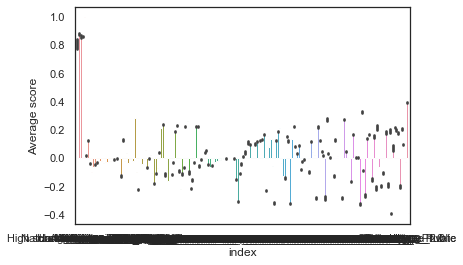

In [54]:
sns.barplot(data = R,
x = 'index',
y = 'Average score'
)

In [66]:
(R_2021 + R_2022)/2

High school conclusion year         NaN
Natural Sciences score         0.806251
Humanities score               0.877723
Languages score                0.861285
Math score                     0.858897
                                 ...   
Q025_B                         0.203940
School type_1.0                0.093173
School type_2.0               -0.028673
School type_Private            0.391017
School type_Public            -0.391017
Name: Average score, Length: 192, dtype: float64

In [62]:
ax[0]

<AxesSubplot: >

In [91]:
ax[0] = values_to_plot[5:80].sort_values(ascending = True).plot(kind = 'barh', 
    figsize = (12,20), 
    ax = ax[0]) 
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].xaxis.set_visible(False)
ax[0].bar_label(ax[0].containers[0], fmt = '%.2f')
ax[0].set_xlim([-0.8, 0.8])

# ax[0].errorbar(x = values_to_plot[5:80].sort_values(ascending = True).values,
#     y = range(75,0),
#     xerr = R.std(axis = 1)[R.mean(axis=1).sort_values(ascending = False).index][5:80].values)

(-0.8, 0.8)

In [103]:
bars

<AxesSubplot: >

In [112]:
hbars

<BarContainer object of 75 artists>

[Text(0, 0, '0.0108693'),
 Text(0, 0, '0.0145057'),
 Text(0, 0, '0.0156287'),
 Text(0, 0, '0.0160686'),
 Text(0, 0, '0.0177691'),
 Text(0, 0, '0.0194848'),
 Text(0, 0, '0.0198419'),
 Text(0, 0, '0.0297942'),
 Text(0, 0, '0.0319197'),
 Text(0, 0, '0.0348462'),
 Text(0, 0, '0.0375198'),
 Text(0, 0, '0.0383918'),
 Text(0, 0, '0.0393693'),
 Text(0, 0, '0.041187'),
 Text(0, 0, '0.0445873'),
 Text(0, 0, '0.0451677'),
 Text(0, 0, '0.0521801'),
 Text(0, 0, '0.0554033'),
 Text(0, 0, '0.0627797'),
 Text(0, 0, '0.0721643'),
 Text(0, 0, '0.0755137'),
 Text(0, 0, '0.0767175'),
 Text(0, 0, '0.0797437'),
 Text(0, 0, '0.0863479'),
 Text(0, 0, '0.0902275'),
 Text(0, 0, '0.0903855'),
 Text(0, 0, '0.0931729'),
 Text(0, 0, '0.0962641'),
 Text(0, 0, '0.0985674'),
 Text(0, 0, '0.105074'),
 Text(0, 0, '0.109319'),
 Text(0, 0, '0.115856'),
 Text(0, 0, '0.11741'),
 Text(0, 0, '0.118782'),
 Text(0, 0, '0.121416'),
 Text(0, 0, '0.122563'),
 Text(0, 0, '0.123169'),
 Text(0, 0, '0.123619'),
 Text(0, 0, '0.126172')

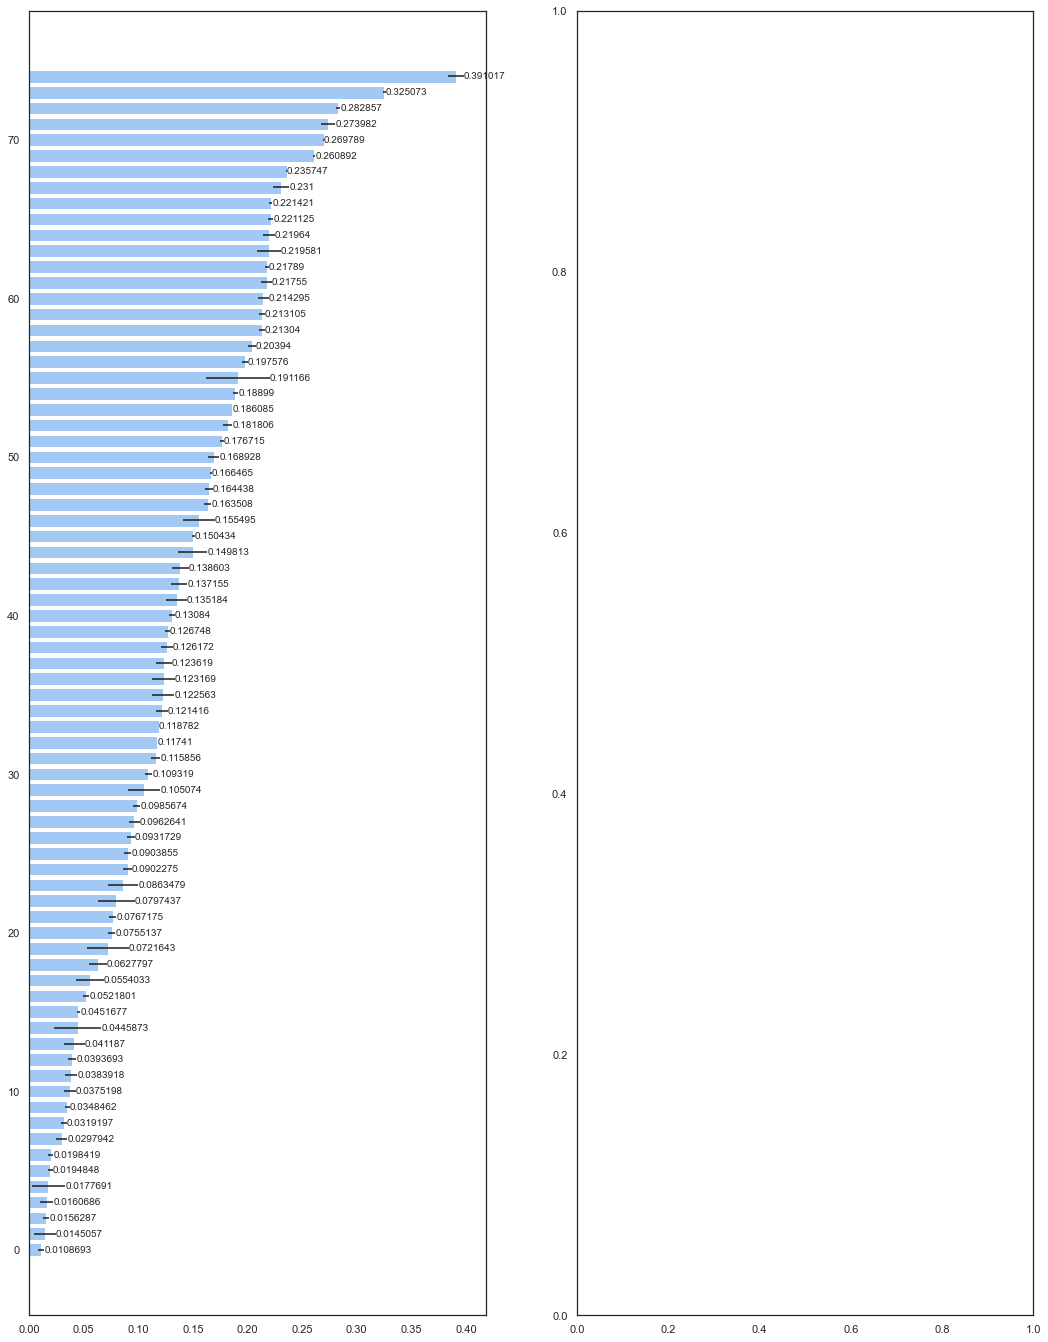

In [113]:
fig, ax = plt.subplots(1,2,figsize = (18,24))

values_to_plot = (0.5*(R_2021 + R_2022)).sort_values(ascending = False)

hbars = ax[0].barh(y = np.arange(0,75),
    width =  values_to_plot[5:80].sort_values(ascending = True).values,
    xerr = R.std(axis = 1)[R.mean(axis=1).sort_values(ascending = False).index][5:80].values)

ax[0].bar_label(hbars)

# hbars = values_to_plot[5:80].sort_values(ascending = True).plot(kind = 'barh', 
#     figsize = (12,20), 
#     ax = ax[0], 
#     xerr = R.std(axis = 1)[R.mean(axis=1).sort_values(ascending = False).index][5:80].values)


In [107]:
bars

AttributeError: 'AxesSubplot' object has no attribute 'container'

In [115]:
R = pd.concat([R_2021, R_2022], axis = 1)

In [116]:
values_to_plot = R.mean(axis=1).sort_values(ascending = False)

In [119]:
values_to_plot[5:80].values

array([0.39101734, 0.32507298, 0.2828565 , 0.27398179, 0.26978873,
       0.26089214, 0.23574746, 0.23100029, 0.22142053, 0.22112464,
       0.2196398 , 0.2195811 , 0.21789018, 0.2175496 , 0.21429496,
       0.21310534, 0.21303983, 0.20393971, 0.197576  , 0.19116646,
       0.18899032, 0.18608458, 0.18180596, 0.17671496, 0.16892807,
       0.16646462, 0.16443836, 0.16350768, 0.15549474, 0.15043375,
       0.14981276, 0.1386028 , 0.13715525, 0.13518407, 0.13084039,
       0.12674756, 0.12617237, 0.12361853, 0.12316881, 0.12256268,
       0.1214164 , 0.11878163, 0.11741016, 0.11585564, 0.10931939,
       0.10507407, 0.0985674 , 0.09626412, 0.09317288, 0.09038554,
       0.09022749, 0.08634793, 0.07974373, 0.0767175 , 0.07551368,
       0.07216431, 0.06277972, 0.05540332, 0.05218009, 0.04516775,
       0.04458733, 0.04118701, 0.03936925, 0.03839181, 0.03751983,
       0.03484618, 0.03191968, 0.02979416, 0.01984192, 0.01948481,
       0.0177691 , 0.01606857, 0.01562873, 0.01450574, 0.01086

In [122]:
np.round(R.std(axis = 1)[R.mean(axis=1).sort_values(ascending = False).index][5:80].values, 3)

array([0.003, 0.01 , 0.003, 0.006, 0.015, 0.003, 0.002, 0.005, 0.003,
       0.002, 0.005, 0.006, 0.004, 0.01 , 0.021, 0.002, 0.003, 0.013,
       0.008, 0.019, 0.003, 0.003, 0.017, 0.014, 0.004, 0.003, 0.003,
       0.005, 0.003, 0.015, 0.003, 0.004, 0.   , 0.   , 0.005, 0.01 ,
       0.01 , 0.007, 0.005, 0.002, 0.003, 0.009, 0.008, 0.008, 0.013,
       0.002, 0.015, 0.003, 0.004, 0.001, 0.005, 0.002, 0.004, 0.   ,
       0.003, 0.029, 0.003, 0.004, 0.003, 0.003, 0.005, 0.005, 0.001,
       0.011, 0.005, 0.003, 0.001, 0.007, 0.   , 0.001, 0.   , 0.007,
       0.002, 0.001, 0.007])

In [133]:
values_to_plot[90:194].shape

(102,)

In [129]:
R.shape

(192, 2)

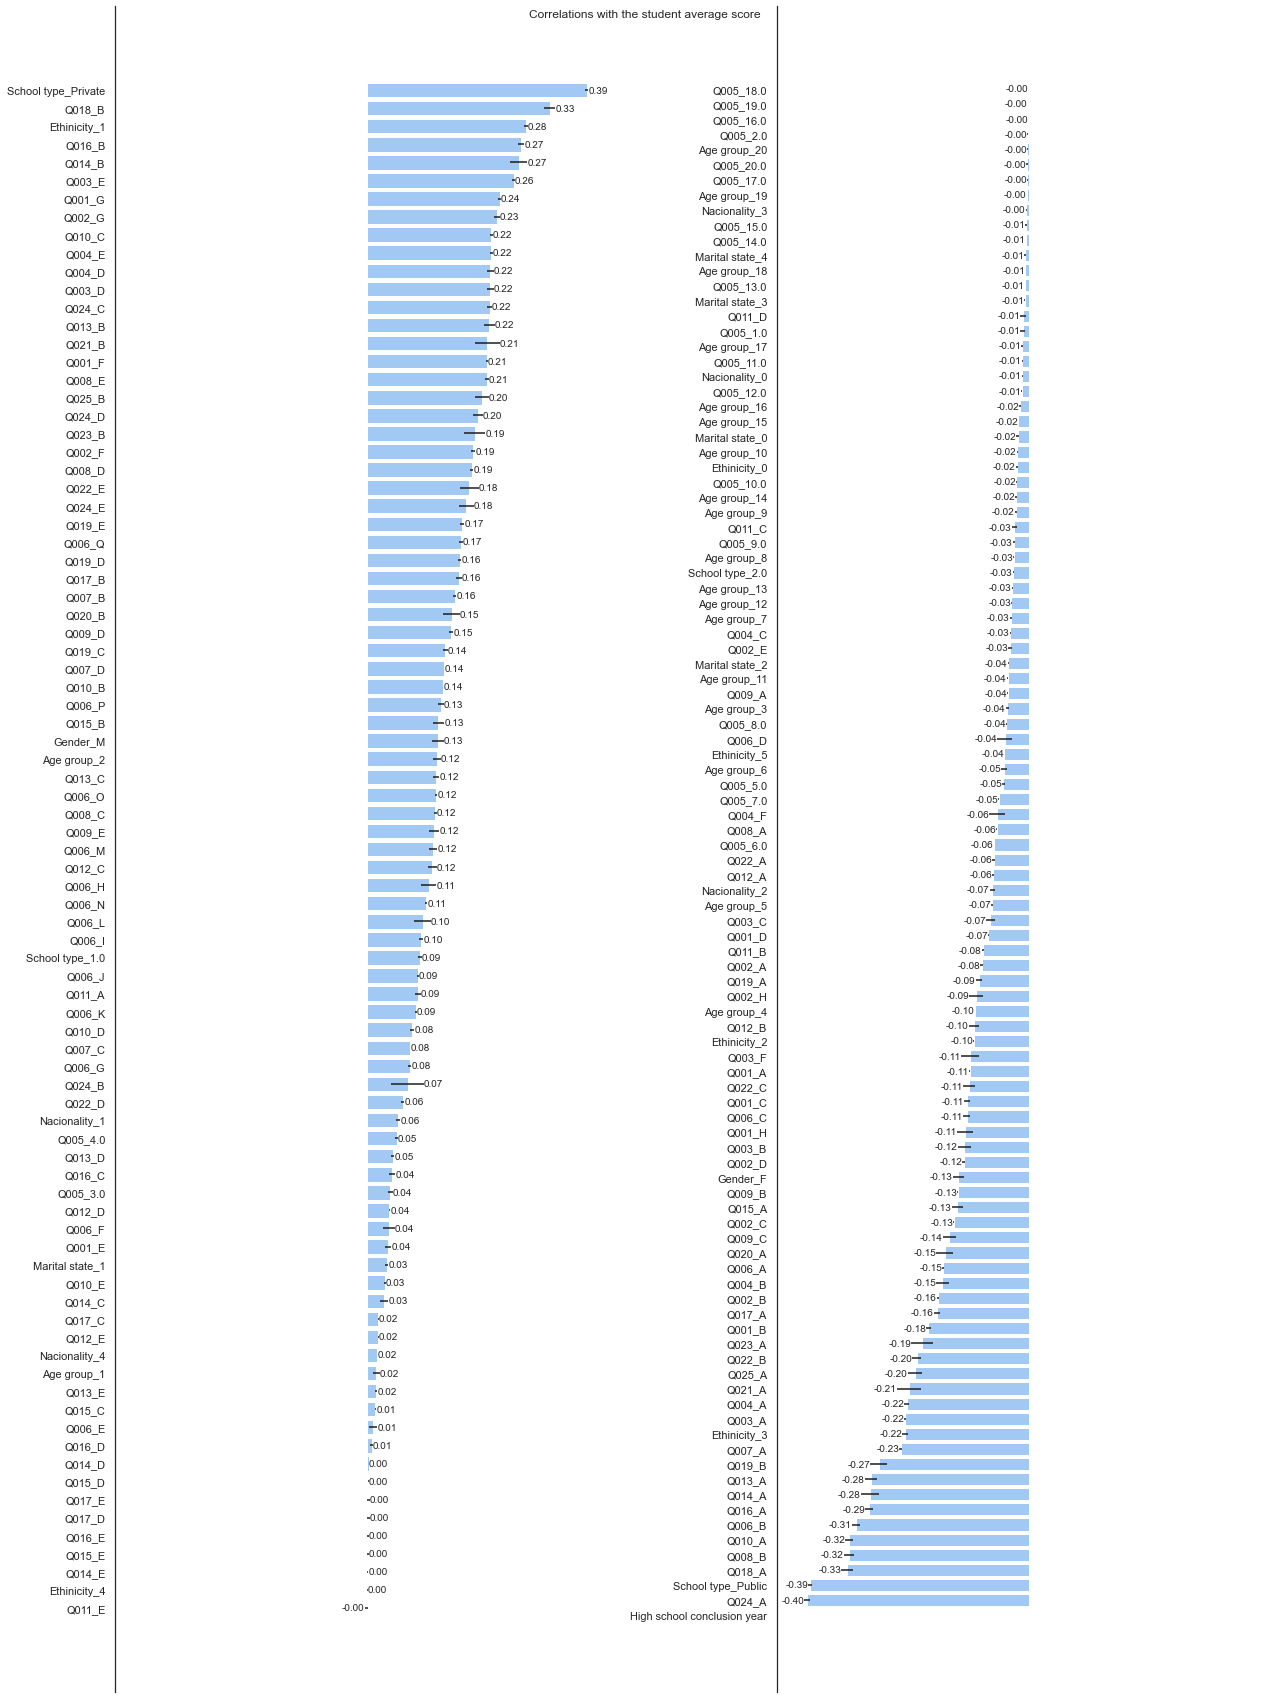

In [137]:
fig, ax = plt.subplots(1,2,figsize = (18,24))

values_to_plot = R.mean(axis=1).sort_values(ascending = False)

# left graph
y_pos = np.arange(0,85)[::-1]
x_values = values_to_plot[5:90].values

hbars = ax[0].barh(y = y_pos,
    width =  x_values,
    xerr = R.std(axis = 1)[R.mean(axis=1).sort_values(ascending = False).index][5:90].values)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)

ax[0].set_yticks(y_pos, labels = values_to_plot[5:90].index)

ax[0].xaxis.set_visible(False)
ax[0].bar_label(hbars, fmt = '%.2f')
ax[0].set_xlim([-0.45, 0.45])

# right graph
y_pos = np.arange(0,102)[::-1]
x_values = values_to_plot[90:194].values

hbars = ax[1].barh(y = y_pos,
    width =  x_values,
    xerr = R.std(axis = 1)[R.mean(axis=1).sort_values(ascending = False).index][90:194].values)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

ax[1].set_yticks(y_pos, labels = values_to_plot[90:194].index)

ax[1].xaxis.set_visible(False)
ax[1].bar_label(hbars, fmt = '%.2f')
ax[1].set_xlim([-0.45, 0.45])

plt.suptitle('Correlations with the student average score')
plt.tight_layout()

In [97]:
max(R.std(axis = 1)[R.mean(axis=1).sort_values(ascending = False).index][5:80].values)

0.029053332728562264

In [67]:
R = pd.concat([R_2021, R_2022], axis = 1)
R.head()

,Average score,Average score
High school conclusion year,NaN,NaN
Natural Sciences score,0.838951,0.773551
Humanities score,0.882723,0.872722
Languages score,0.873743,0.848827
Math score,0.853377,0.864417


In [71]:
R.mean(axis = 1).sort_values(ascending = False)

Average score                  1.000000
Humanities score               0.877723
Languages score                0.861285
Math score                     0.858897
Natural Sciences score         0.806251
                                 ...   
Q008_B                        -0.321494
Q018_A                        -0.325073
School type_Public            -0.391017
Q024_A                        -0.396440
High school conclusion year         NaN
Length: 192, dtype: float64

In [99]:
R.std(axis = 1)[R.mean(axis=1).sort_values(ascending = False).index][0:20]

Average score             0.000000
Humanities score          0.007071
Languages score           0.017619
Math score                0.007806
Natural Sciences score    0.046245
School type_Private       0.002953
Q018_B                    0.009968
Ethinicity_1              0.002868
Q016_B                    0.006121
Q014_B                    0.015415
Q003_E                    0.002532
Q001_G                    0.002401
Q002_G                    0.005202
Q010_C                    0.002789
Q004_E                    0.002324
Q004_D                    0.005398
Q003_D                    0.005707
Q024_C                    0.003842
Q013_B                    0.009572
Q021_B                    0.021491
dtype: float64

In [109]:
bars

<AxesSubplot: >

### 2.2 Correlations with external factors

Let us evaluate correlations with the external variables.

In [151]:
years_in_siope = siope_df['year'].unique()
years_in_siope.sort()

In [153]:
years_in_siope

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022])

Unfortunately, we don't have information about every metric for every year and state.

<AxesSubplot: xlabel='metric_code', ylabel='year'>

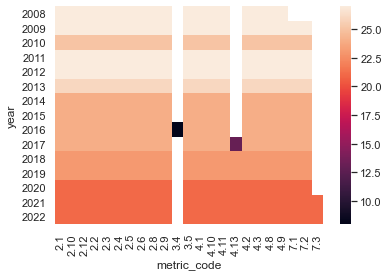

In [317]:
sns.heatmap(siope_df.groupby(["year", "metric_code"])["metric_code"].count().unstack())

#### 2.2.1. Correlations using time-windows

For each year students took participated in the ENEM, let us calculate the correlations with these variables and their average score in the test, using a time window to analyze whether we can spot correlation patterns changes overtime.

In [181]:
def merge_siope_data_with_average_scores(SIOPE_METRICS_DICT, grouped_siope_data, enem_data, current_year):
    metrics_added = []
    df2 = enem_data[enem_data["ENEM_year"] == current_year][["UF", "Average score", "Natural Sciences score"]].copy()

    for metric in SIOPE_METRICS_DICT.values():
        try:
            df2 = df2.merge(grouped_siope_data[metric], how = 'left', on = 'UF')
            metrics_added.append(metric)
        except:
            df2 = df2
    
    return df2

In [328]:
def reformat_external_siope_correlations(siope_correlations_data):
    siope_correlations_data.reset_index(inplace = True)
    siope_correlations_data.rename(columns = {"index": "metric"}, inplace = True)
    formatted_data = pd.DataFrame()
    i = 0
    for metric in siope_correlations_data['metric'].unique():
        aux_df = siope_correlations_data[siope_correlations_data['metric'] == metric][['window', 'Average score']]
        aux_df.rename(columns = {"Average score": metric}, inplace = True)

        if i == 0:
            formatted_data = pd.concat([formatted_data, aux_df], axis = 1)
        else:
            formatted_data = formatted_data.merge(aux_df, on = 'window', how = 'left')
        i += 1
    return formatted_data

In [ ]:
def run_longitudinal_correlation_analysis(years_to_analyze, time_window):
    R_external_all_years = {}
    for year in years_to_analyze:
        R_external = pd.DataFrame()
        print(f"Running analysis for ENEM {year}")
        for window in n:
            print(f"Running for the last {window} year(s)")
            # get metrics average values over last 'window' years
            grouped_siope_df = siope_df[(siope_df['year'] >= year - window)].groupby(["UF", "metric_description"])["metric_value"].mean().unstack()

            siope_data_with_scores_df = merge_siope_data_with_average_scores(SIOPE_METRICS_DICT, grouped_siope_df, enem_df, year)
            r = siope_data_with_scores_df.corr(method = 'spearman', numeric_only = True)
            r["window"] = window
            R_external = pd.concat([R_external, r[["Average score", "window"]]], axis = 0)

            del siope_data_with_scores_df
        joblib.dump(R_external, f"siope_correlations_ENEM_{year}.pkl")

        R_external_all_years[year] = R_external
        del R_external
    
    return R_external_all_years 
    

In [320]:
 n = np.arange(0,16)

for year in years_to_analyze:
    R_external = pd.DataFrame()
    print(f"Running analysis for ENEM {year}")
    for window in n:
        print(f"Running for the last {window} year(s)")
        # get metrics average values over last 'window' years
        grouped_siope_df = siope_df[(siope_df['year'] >= year - window)].groupby(["UF", "metric_description"])["metric_value"].mean().unstack()

        siope_data_with_scores_df = merge_siope_data_with_average_scores(SIOPE_METRICS_DICT, grouped_siope_df, enem_df, year)
        r = siope_data_with_scores_df.corr(method = 'spearman', numeric_only = True)
        r["window"] = window
        R_external = pd.concat([R_external, r[["Average score", "window"]]], axis = 0)

        del siope_data_with_scores_df
    joblib.dump(R_external, f"siope_correlations_ENEM_{year}.pkl")
    del R_external

Running analysis for ENEM 2021
Running for the last 0 year(s)
Running for the last 1 year(s)
Running for the last 2 year(s)
Running for the last 3 year(s)
Running for the last 4 year(s)
Running for the last 5 year(s)
Running for the last 6 year(s)
Running for the last 7 year(s)
Running for the last 8 year(s)
Running for the last 9 year(s)
Running for the last 10 year(s)
Running for the last 11 year(s)
Running for the last 12 year(s)
Running for the last 13 year(s)
Running for the last 14 year(s)
Running for the last 15 year(s)
Running analysis for ENEM 2022
Running for the last 0 year(s)
Running for the last 1 year(s)
Running for the last 2 year(s)
Running for the last 3 year(s)
Running for the last 4 year(s)
Running for the last 5 year(s)
Running for the last 6 year(s)
Running for the last 7 year(s)
Running for the last 8 year(s)
Running for the last 9 year(s)
Running for the last 10 year(s)
Running for the last 11 year(s)
Running for the last 12 year(s)
Running for the last 13 year(s

In [321]:
R_ext_2021 = joblib.load("siope_correlations_ENEM_2021.pkl")
R_ext_2022 = joblib.load("siope_correlations_ENEM_2022.pkl")

In [329]:
R_ext_2021 = reformat_external_siope_correlations(R_ext_2021)

In [334]:
R_ext_2021.head()

,window,Average score,EI_FUNDEB_ratio,EF_FUNDEB_ratio,EM_FUNDEB_ratio,EF_to_total_education_expanses,EI_to_total_education_expanses,EM_to_total_education_expanses,education_to_overall_expanses,scholar_nutrition_to_total_education_expanses,...,EM_investment_per_student,EB_investment_per_student,investment_per_student,EB_expanses_teacher_per_student,EB_non_teaching_staff_per_student_expanses,investment_per_student_to_PIB_per_capita,superavit_or_deficit,FUNDEB_balance,FUNDEB_not_used,average_teacher_expanses_EB
0,0,1.0,NaN,0.188581,-0.196231,0.098064,-0.059303,-0.212312,-0.029748,-0.129630,...,-0.086427,0.144229,0.131483,-0.059125,0.075363,NaN,0.094797,0.173321,-0.153533,NaN
1,1,1.0,NaN,0.131417,-0.132362,0.051403,-0.050460,-0.185474,-0.024847,-0.134070,...,-0.002188,0.045861,0.024247,-0.126553,0.015223,NaN,0.193932,0.168890,-0.153533,NaN
2,2,1.0,NaN,0.100095,-0.092784,0.036797,-0.058309,-0.138482,0.016508,-0.043420,...,-0.013876,-0.025145,-0.074506,-0.136322,-0.018347,NaN,0.051593,0.154528,-0.153533,NaN
3,3,1.0,NaN,0.088621,-0.065150,0.036161,-0.050778,-0.139403,0.003554,-0.034507,...,0.073817,-0.075643,-0.073891,-0.117604,-0.017980,NaN,0.145460,0.109083,-0.153533,NaN
4,4,1.0,0.032932,0.066603,-0.073842,0.095019,0.116797,-0.076959,0.019412,-0.039362,...,0.129025,0.108107,0.128801,-0.099752,0.032717,NaN,0.103913,0.133741,-0.153533,NaN


In [358]:
metrics_to_use = siope_df[siope_df["year"] == 2008]["metric_description"].unique()

In [364]:
siope_df.head()

,year,metric_code,metric_value,UF,metric_description
0,2008,2.1,0.00,RO,EI_FUNDEB_ratio
1,2008,4.11,62.50,RO,EB_non_teaching_staff_per_student_expanses
2,2008,2.3,0.00,RO,EM_FUNDEB_ratio
3,2008,2.4,0.00,RO,EI_to_total_education_expanses
4,2008,2.5,78.36,RO,EF_to_total_education_expanses


In [367]:
siope_df[siope_df["metric_description"].isin(metrics_to_use)].groupby("year")["metric_description"].nunique()

year
2008    18
2009    18
2010    18
2011    18
2012    18
2013    18
2014    18
2015    18
2016    18
2017    18
2018    18
2019    18
2020    18
2021    18
2022    18
Name: metric_description, dtype: int64

Text(0.5, 1.0, 'Correlações das métricas externas (SIOPE) por janela temporal - ENEM 2021')

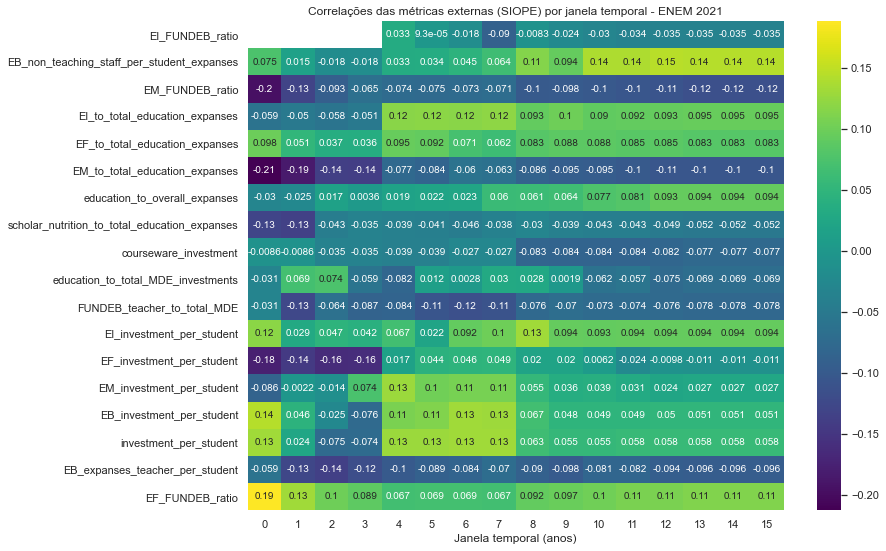

In [360]:
plt.figure(figsize = (12,9))
sns.heatmap(R_ext_2021[metrics_to_use].transpose(),
    cmap = 'viridis',
    annot = True)
plt.xlabel("Janela temporal (anos)")
plt.title("Correlações das métricas externas (SIOPE) por janela temporal - ENEM 2021")

Text(0.5, 1.0, 'Correlações das métricas externas (SIOPE) por janela temporal - ENEM 2021')

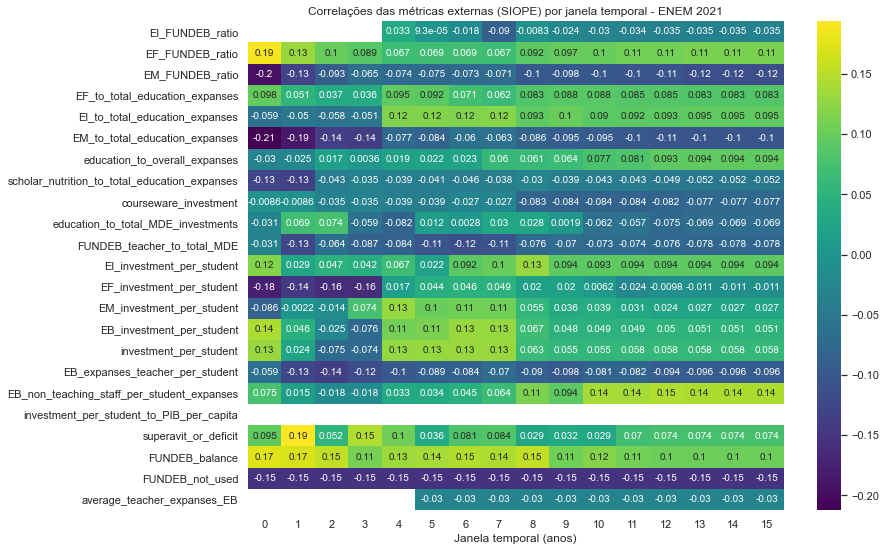

In [343]:
plt.figure(figsize = (12,9))
sns.heatmap(R_ext_2021.drop(columns = ["window", "Average score"]).transpose(),
    cmap = 'viridis',
    annot = True)
plt.xlabel("Janela temporal (anos)")
plt.title("Correlações das métricas externas (SIOPE) por janela temporal - ENEM 2021")

<AxesSubplot: xlabel='year', ylabel='UF'>

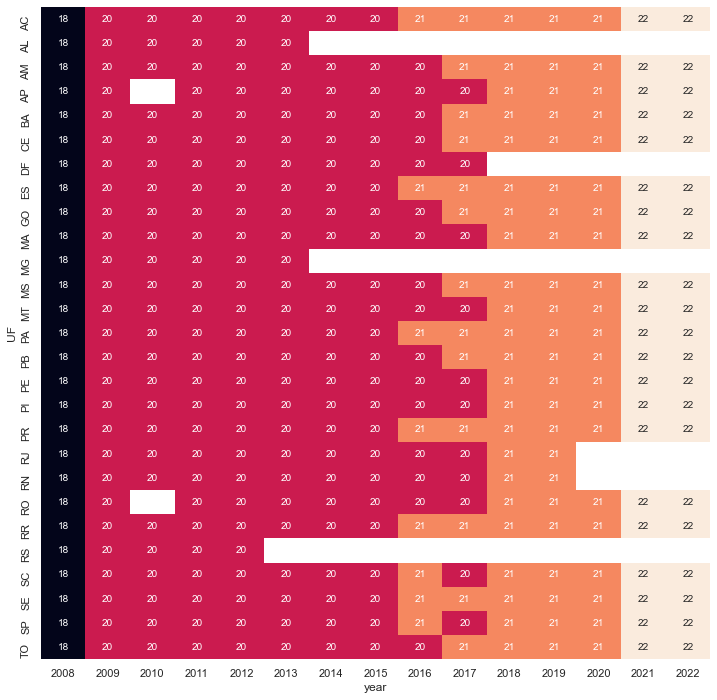

In [352]:
plt.figure(figsize = (12,12))
sns.heatmap(siope_df.groupby(["year", "UF"])["UF"].count().unstack().transpose(),
    annot = True, cbar = False)

<AxesSubplot: xlabel='year', ylabel='metric_description'>

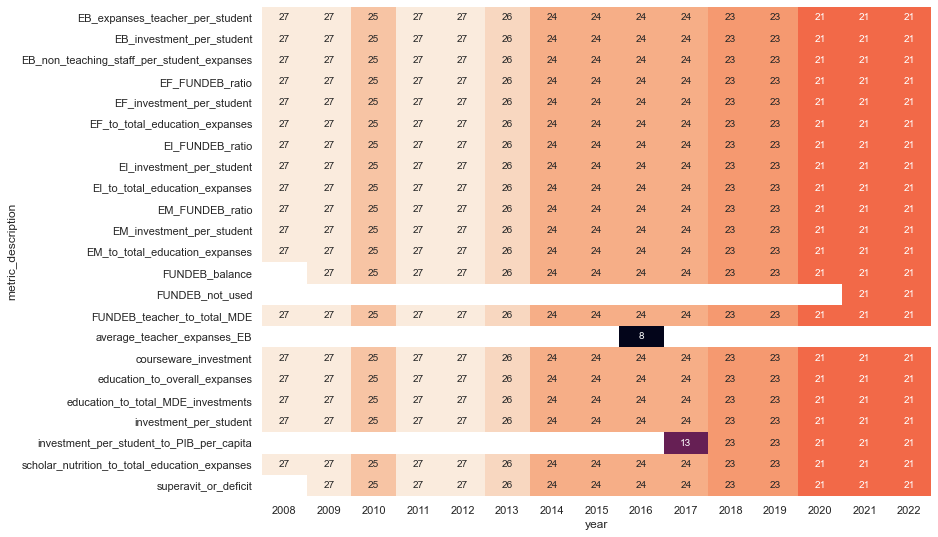

In [353]:
plt.figure(figsize = (12,9))
sns.heatmap(siope_df.groupby(["year", "metric_description"])["UF"].count().unstack().transpose(),
    annot = True, cbar = False)

In [344]:
siope_df.columns

Index(['year', 'metric_code', 'metric_value', 'UF', 'metric_description'], dtype='object')

In [160]:
current_year = 2022
window = 0

grouped_siope_df = siope_df[(siope_df['year'] >= current_year - window)].groupby(["UF", "metric_description"])["metric_value"].mean().unstack()

metrics_added = []
df2 = df.copy()
for metric in SIOPE_METRICS_DICT.values():
    try:
        df2 = df2.merge(grouped_sinop_df[metric], how = 'left', on = 'UF')
        metrics_added.append(metric)
    except:
        df2 = df2

siope_data = siope_df[siope_df["year"] >= 2022 - window]
siope_data = siope_data.merge(enem_df[enem_df["ENEM_year"] == current_year][["UF", "Average score"]], how = 'left', on = ['UF'])

In [162]:
grouped_siope_df = siope_df[(siope_df['year'] >= 2008)].groupby(["UF", "metric_description"])["metric_value"].mean().unstack()

In [163]:
grouped_siope_df

metric_description,EB_expanses_teacher_per_student,EB_investment_per_student,EB_non_teaching_staff_per_student_expanses,EF_FUNDEB_ratio,EF_investment_per_student,EF_to_total_education_expanses,EI_FUNDEB_ratio,EI_investment_per_student,EI_to_total_education_expanses,EM_FUNDEB_ratio,...,FUNDEB_not_used,FUNDEB_teacher_to_total_MDE,average_teacher_expanses_EB,courseware_investment,education_to_overall_expanses,education_to_total_MDE_investments,investment_per_student,investment_per_student_to_PIB_per_capita,scholar_nutrition_to_total_education_expanses,superavit_or_deficit
UF,,,,,,,,,,,,,,,,,,,,,
AC,3635.519333,6579.541333,149.376000,78.766000,6465.145333,70.979333,0.035333,5026.571333,0.334667,21.033333,...,2.845617e+07,61.656667,0.88,1.207333,19.165333,6.074000,6685.912000,0.0,0.282000,-2.655696e+07
AL,1628.285000,2920.473333,628.688333,72.645000,5232.400000,70.855000,0.000000,517.978333,0.030000,22.546667,...,NaN,55.445000,NaN,0.000000,17.216667,4.596667,3045.231667,NaN,0.021667,-6.838878e+07
AM,2137.502667,4892.214000,421.335333,65.554000,5520.249333,55.016667,0.013333,3955.142000,0.112667,32.064000,...,3.430979e+07,33.165333,NaN,15.880000,16.232000,8.197333,5038.304000,0.0,0.830667,3.827969e+08
AP,4485.423571,9693.315714,1199.333571,75.948571,10012.520000,79.421429,0.008571,23237.180714,7.295714,23.257143,...,2.872245e+06,47.780714,NaN,0.000000,25.211429,2.210000,10353.432857,0.0,0.574286,6.764498e+08
BA,3005.346000,5506.271333,166.709333,34.378000,5018.958667,23.780667,0.013333,2921.144667,0.066000,63.403333,...,1.908919e+08,43.828000,NaN,0.160667,13.449333,2.262000,6351.024667,0.0,0.044667,1.303817e+09
CE,3237.058000,6307.088000,529.256667,16.782000,5307.211333,13.908000,0.025333,5435.332667,0.256000,81.138000,...,1.947317e+08,38.868667,NaN,2.874000,13.992667,6.106000,6898.472667,0.0,0.881333,1.794286e+08
DF,5113.448000,6784.513000,587.432000,76.153000,7504.298000,51.622000,4.938000,6095.716000,7.196000,14.667000,...,NaN,56.515000,NaN,0.022000,32.125000,1.434000,6758.553000,NaN,0.399000,4.622191e+08
ES,2556.263333,6201.308000,712.836000,55.632667,7276.948000,49.733333,0.000000,69.786000,0.441333,42.639333,...,4.989603e+07,34.550667,0.72,0.000000,12.550667,5.408667,6147.724000,0.0,0.422667,4.376361e+08
GO,3772.728000,5998.958667,551.632000,72.736667,7319.495333,56.509333,0.010667,46892.796667,0.116000,23.993333,...,1.522104e+08,57.083333,NaN,0.094667,16.924667,4.335333,6177.446667,0.0,0.260667,2.006830e+09


In [174]:
grouped_siope_df = siope_df[(siope_df['year'] >= 2008)].groupby(["UF", "metric_description"])["metric_value"].mean().unstack()
metrics_added = []
df2 = enem_df[enem_df["ENEM_year"] == current_year][["UF", "Average score"]].copy()

for metric in SIOPE_METRICS_DICT.values():
    try:
        df2 = df2.merge(grouped_siope_df[metric], how = 'left', on = 'UF')
        metrics_added.append(metric)
    except:
        df2 = df2

In [175]:
df2.head()

,UF,Average score,EI_FUNDEB_ratio,EF_FUNDEB_ratio,EM_FUNDEB_ratio,EF_to_total_education_expanses,EI_to_total_education_expanses,EM_to_total_education_expanses,education_to_overall_expanses,scholar_nutrition_to_total_education_expanses,...,EF_investment_per_student,EM_investment_per_student,EB_investment_per_student,investment_per_student,EB_expanses_teacher_per_student,EB_non_teaching_staff_per_student_expanses,investment_per_student_to_PIB_per_capita,superavit_or_deficit,FUNDEB_balance,FUNDEB_not_used
0,CE,449.925,0.025333,16.782000,81.138000,13.908000,0.256000,64.225333,13.992667,0.881333,...,5307.211333,6421.892000,6307.088000,6898.472667,3237.0580,529.256667,0.0,1.794286e+08,1.156271e+08,1.947317e+08
1,SP,766.925,0.008000,57.009333,41.254000,40.095333,4.748667,40.553333,17.448000,0.342667,...,5595.066000,8897.180667,8572.593333,9897.517333,2809.1220,1092.695333,0.0,1.615154e+09,1.691679e+09,0.000000e+00
2,GO,539.050,0.010667,72.736667,23.993333,56.509333,0.116000,30.692667,16.924667,0.260667,...,7319.495333,4554.062667,5998.958667,6177.446667,3772.7280,551.632000,0.0,2.006830e+09,6.105089e+07,1.522104e+08
3,PA,457.450,0.086667,50.304000,46.482000,37.458667,0.142667,39.631333,15.246000,0.006000,...,5127.911333,4043.182667,4366.503333,4507.713333,3008.8340,220.354000,0.0,1.188040e+09,5.948811e+07,5.089881e+07
4,RJ,477.075,0.025833,47.840000,50.339167,37.319167,5.261667,34.245000,10.129167,0.000000,...,7797.210000,5027.366667,6579.660000,7574.906667,2965.5175,300.236667,0.0,-2.921392e+09,1.415854e+08,NaN


In [177]:
R_ext = df2.drop(columns = "UF").corr(method = 'spearman')

In [186]:
abs(R_ext["Average score"].sort_values(ascending = False))

Average score                                    1.000000
EB_non_teaching_staff_per_student_expanses       0.126877
EF_FUNDEB_ratio                                  0.114935
FUNDEB_balance                                   0.098419
EI_investment_per_student                        0.091229
EF_to_total_education_expanses                   0.088508
education_to_overall_expanses                    0.075390
EI_to_total_education_expanses                   0.072704
superavit_or_deficit                             0.064230
investment_per_student                           0.042045
EB_investment_per_student                        0.034432
EM_investment_per_student                        0.013053
EF_investment_per_student                        0.008874
EI_FUNDEB_ratio                                  0.024239
average_teacher_expanses_EB                      0.037458
scholar_nutrition_to_total_education_expanses    0.052523
education_to_total_MDE_investments               0.064849
courseware_inv

In [243]:
r = {}
p = {}

for i in siope_data_with_scores_df.columns:
    r[i], p[i] = spearmanr(siope_data_with_scores_df[i], siope_data_with_scores_df["Average score"])

In [261]:
R_external.reset_index(inplace = True)

In [ ]:
R_external.set_index()

In [271]:
R_external.rename(columns = {"index": "metric"}, inplace = True)

In [272]:
R_external.head()

,metric,Average score,window
0,Average score,1.000000,0
1,EI_FUNDEB_ratio,NaN,0
2,EF_FUNDEB_ratio,0.180427,0
3,EM_FUNDEB_ratio,-0.176175,0
4,EF_to_total_education_expanses,0.080211,0


In [284]:
R_external_2 = pd.DataFrame()
i = 0
for metric in R_external['metric'].unique():
    aux_df = R_external[R_external['metric'] == metric][['window', 'Average score']]
    aux_df.rename(columns = {"Average score": metric}, inplace = True)

    if i == 0:
        R_external_2 = pd.concat([R_external_2, aux_df], axis = 1)
    else:
        R_external_2 = R_external_2.merge(aux_df, on = 'window', how = 'left')
    i += 1

In [295]:
R_external_2.columns

Index(['window', 'Average score', 'EI_FUNDEB_ratio', 'EF_FUNDEB_ratio',
       'EM_FUNDEB_ratio', 'EF_to_total_education_expanses',
       'EI_to_total_education_expanses', 'EM_to_total_education_expanses',
       'education_to_overall_expanses',
       'scholar_nutrition_to_total_education_expanses',
       'courseware_investment', 'education_to_total_MDE_investments',
       'FUNDEB_teacher_to_total_MDE', 'EI_investment_per_student',
       'EF_investment_per_student', 'EM_investment_per_student',
       'EB_investment_per_student', 'investment_per_student',
       'EB_expanses_teacher_per_student',
       'EB_non_teaching_staff_per_student_expanses',
       'investment_per_student_to_PIB_per_capita', 'superavit_or_deficit',
       'FUNDEB_balance', 'FUNDEB_not_used', 'average_teacher_expanses_EB'],
      dtype='object')

<AxesSubplot: xlabel='window', ylabel='EB_investment_per_student'>

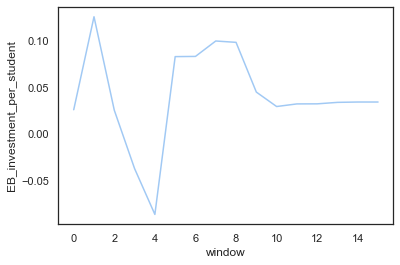

In [302]:
sns.lineplot(data = R_external_2,
    x = 'window',
    y = 'EB_investment_per_student')

In [288]:
R_external_2

,window,Average score,EI_FUNDEB_ratio,EF_FUNDEB_ratio,EM_FUNDEB_ratio,EF_to_total_education_expanses,EI_to_total_education_expanses,EM_to_total_education_expanses,education_to_overall_expanses,scholar_nutrition_to_total_education_expanses,...,EM_investment_per_student,EB_investment_per_student,investment_per_student,EB_expanses_teacher_per_student,EB_non_teaching_staff_per_student_expanses,investment_per_student_to_PIB_per_capita,superavit_or_deficit,FUNDEB_balance,FUNDEB_not_used,average_teacher_expanses_EB
0,0,1.0,NaN,0.180427,-0.176175,0.080211,-0.029952,-0.185154,-0.092013,-0.107075,...,-0.025803,0.026142,0.110714,-0.053683,-0.050509,NaN,0.044711,0.161448,-0.144739,NaN
1,1,1.0,NaN,0.178737,-0.183355,0.095289,-0.048158,-0.199453,-0.036773,-0.134873,...,-0.093735,0.126021,0.111208,-0.083533,0.073817,NaN,0.074349,0.156010,-0.134658,NaN
2,2,1.0,NaN,0.133244,-0.133492,0.059102,-0.043566,-0.177234,-0.033804,-0.140492,...,-0.018629,0.025619,0.005121,-0.137920,0.021637,NaN,0.175741,0.150713,-0.134658,NaN
3,3,1.0,NaN,0.103735,-0.098203,0.043131,-0.046365,-0.139112,0.008785,-0.048583,...,-0.026490,-0.037064,-0.080855,-0.145274,-0.016466,NaN,0.029481,0.140253,-0.134658,NaN
4,4,1.0,NaN,0.092586,-0.075828,0.042653,-0.038318,-0.139404,-0.004491,-0.041418,...,0.052388,-0.086274,-0.081086,-0.123001,-0.021223,NaN,0.126550,0.096647,-0.134658,NaN
5,5,1.0,0.036652,0.077732,-0.085625,0.099731,0.090650,-0.084501,0.011225,-0.042963,...,0.101190,0.083195,0.104159,-0.104347,0.020430,NaN,0.086375,0.121641,-0.134658,NaN
6,6,1.0,0.007895,0.081525,-0.086694,0.096525,0.091413,-0.090608,0.015169,-0.042821,...,0.071611,0.083406,0.099222,-0.093055,0.023305,NaN,0.020256,0.127084,-0.134658,-0.037458
7,7,1.0,-0.020513,0.081874,-0.085615,0.080561,0.087289,-0.075168,0.016701,-0.046798,...,0.077810,0.099969,0.100537,-0.089390,0.032048,NaN,0.068801,0.131788,-0.134658,-0.037458
8,8,1.0,-0.079053,0.079443,-0.082802,0.071532,0.093002,-0.076433,0.044288,-0.038047,...,0.079577,0.098519,0.101440,-0.074872,0.052176,NaN,0.071874,0.130363,-0.134658,-0.037458
9,9,1.0,0.001353,0.102880,-0.110414,0.089549,0.069933,-0.098136,0.047008,-0.032612,...,0.035551,0.045112,0.042156,-0.094023,0.105032,NaN,0.020567,0.141856,-0.134658,-0.037458


<AxesSubplot: xlabel='window'>

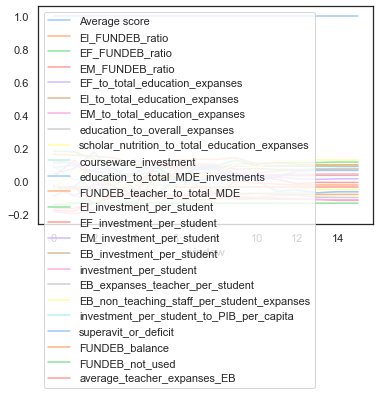

In [278]:
R_external_2

,window,Average score,window,Average score,window,Average score,window,Average score,window,Average score,...,window,Average score,window,Average score,window,Average score,window,Average score,window,Average score
0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,-0.037458
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,-0.037458
317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,-0.037458
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,-0.037458


In [259]:
R_external.groupby("window")[["EF_FUNDEB_ratio", "FUNDEB_not_used"]].mean()

KeyError: "Columns not found: 'EF_FUNDEB_ratio', 'FUNDEB_not_used'"

In [254]:
R_external["EF_FUNDEB_ratio"]

KeyError: 'EF_FUNDEB_ratio'

In [255]:
R_external

,0
Average score,1.000000
EI_FUNDEB_ratio,NaN
EF_FUNDEB_ratio,0.180427
EM_FUNDEB_ratio,-0.176175
EF_to_total_education_expanses,0.080211
...,...
investment_per_student_to_PIB_per_capita,NaN
superavit_or_deficit,0.064230
FUNDEB_balance,0.098419
FUNDEB_not_used,-0.134658


Graph considering SIOPE data from 2022 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     6.604990e+06
AL     512.743883              NaN
AM     492.254220     6.643711e+07
AP     495.929105     5.005544e+06
BA     519.265226     1.995258e+07
CE     498.527925     1.551525e+08
DF     541.336009              NaN
ES     536.361601     6.412607e+07
GO     520.060609     1.729171e+08
MA     493.138612     4.766160e+06
MG     550.237539              NaN
MS     522.928453     4.092974e+07
MT     515.108975     2.300292e+08
PA     500.616448     2.549017e+07
PB     515.831051     1.092969e+08
PE     521.584773     3.356645e+08
PI     513.005297     3.388487e+07
PR     535.984980     1.088798e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     0.000000e+00
RR     514.555936     3.245098e+07
RS     539.186444              NaN
SC     543.311559     2.059342e+07
SE     515.966445     5.044878e+05
SP     5

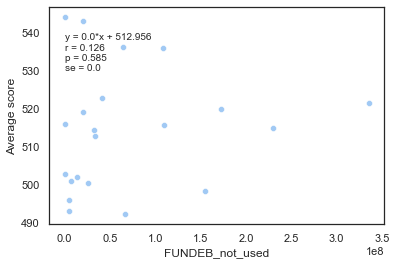

Graph considering SIOPE data from 2021 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

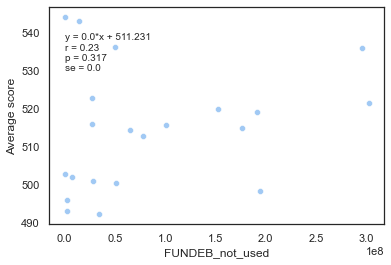

Graph considering SIOPE data from 2020 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

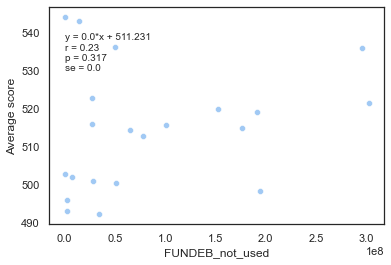

Graph considering SIOPE data from 2019 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

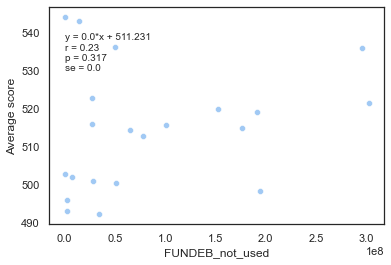

Graph considering SIOPE data from 2018 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

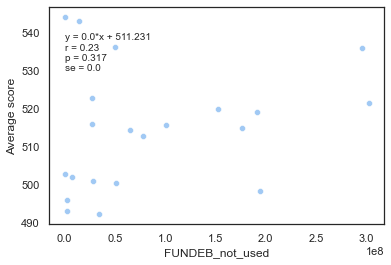

Graph considering SIOPE data from 2017 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

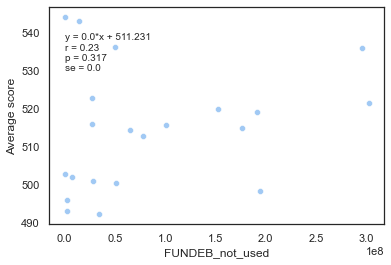

Graph considering SIOPE data from 2016 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

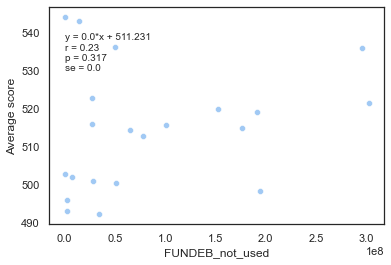

Graph considering SIOPE data from 2015 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

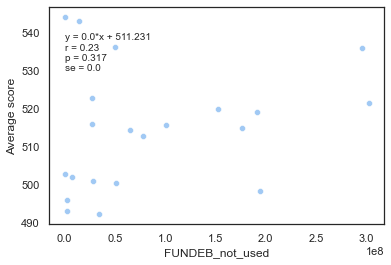

Graph considering SIOPE data from 2014 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

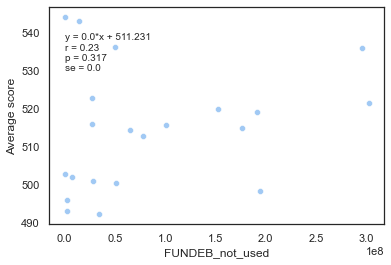

Graph considering SIOPE data from 2013 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

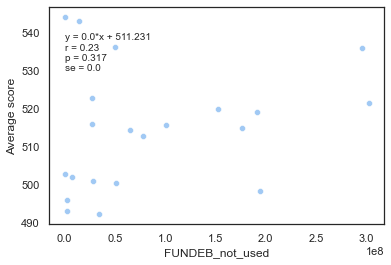

Graph considering SIOPE data from 2012 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

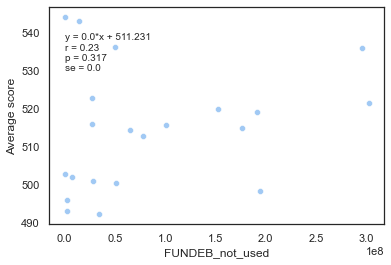

Graph considering SIOPE data from 2011 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

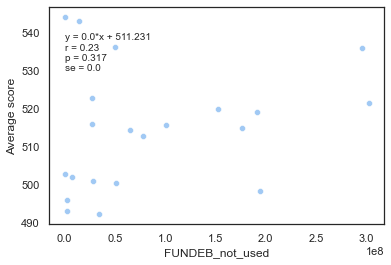

Graph considering SIOPE data from 2010 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

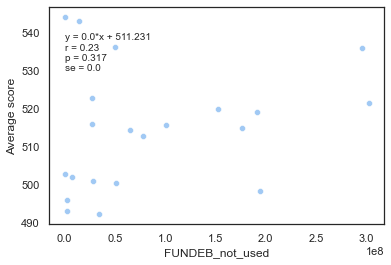

Graph considering SIOPE data from 2009 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

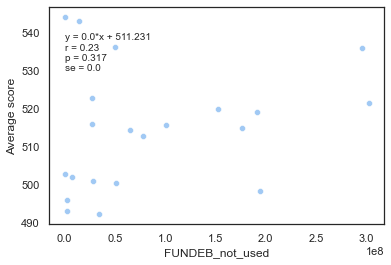

Graph considering SIOPE data from 2008 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

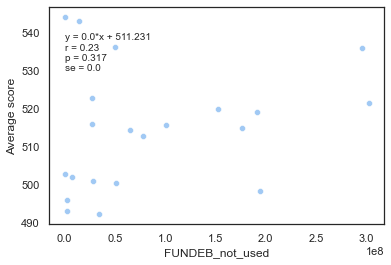

Graph considering SIOPE data from 2007 to 2022
    Average score  FUNDEB_not_used
UF                                
AC     500.941579     2.845617e+07
AL     512.743883              NaN
AM     492.254220     3.430979e+07
AP     495.929105     2.872245e+06
BA     519.265226     1.908919e+08
CE     498.527925     1.947317e+08
DF     541.336009              NaN
ES     536.361601     4.989603e+07
GO     520.060609     1.522104e+08
MA     493.138612     2.383080e+06
MG     550.237539              NaN
MS     522.928453     2.741560e+07
MT     515.108975     1.766481e+08
PA     500.616448     5.089881e+07
PB     515.831051     1.010479e+08
PE     521.584773     3.026724e+08
PI     513.005297     7.780587e+07
PR     535.984980     2.956076e+08
RJ     542.709208              NaN
RN     527.648552              NaN
RO     502.833553     2.428870e+05
RR     514.555936     6.505123e+07
RS     539.186444              NaN
SC     543.311559     1.440078e+07
SE     515.966445     2.768641e+07
SP     5

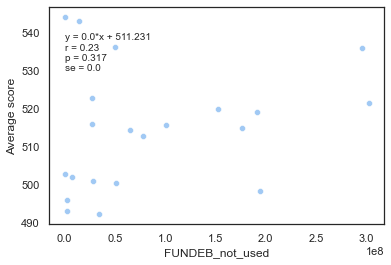

In [305]:
 n = np.arange(0,16)
# n = [0]
current_year = 2022

for window in n:
    # get metrics average values over last 'window' years
    grouped_siope_df = siope_df[(siope_df['year'] >= current_year - window)].groupby(["UF", "metric_description"])["metric_value"].mean().unstack()

    siope_data_with_scores_df = merge_siope_data_with_average_scores(SIOPE_METRICS_DICT, grouped_siope_df, enem_df, current_year)

    data = siope_data_with_scores_df.groupby(["UF"])[["Average score", "FUNDEB_not_used"]].mean()
    print(f"Graph considering SIOPE data from {current_year - window} to {current_year}")
    sns.scatterplot(data = data,
    x = 'FUNDEB_not_used',
    y = 'Average score'
    )

    print(data)

    data.dropna(inplace = True)
    slope, intercept, r, p, se = linregress(x = data["FUNDEB_not_used"], y = data["Average score"])

    xx = np.arange(0,100)
    yy = slope*xx + intercept
    plt.plot(xx, yy, '-.r')

    plt.text(x = 15, y = 530, s = f"y = {np.round(slope,3)}*x + {np.round(intercept,3)}\nr = {np.round(r,3)}\np = {np.round(p,3)}\nse = {np.round(se,3)}")

    plt.show()

    del siope_data_with_scores_df


Graph considering SIOPE data from 2022 to 2022


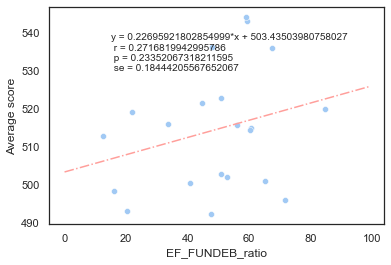

Graph considering SIOPE data from 2021 to 2022


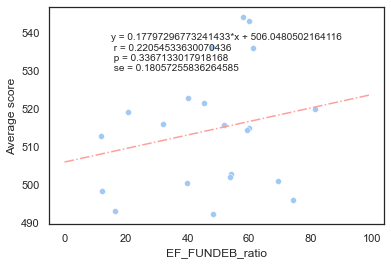

Graph considering SIOPE data from 2020 to 2022


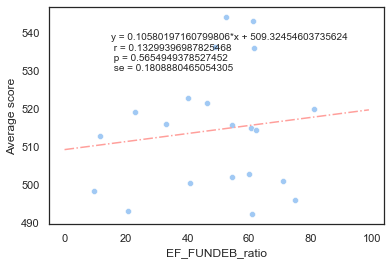

Graph considering SIOPE data from 2019 to 2022


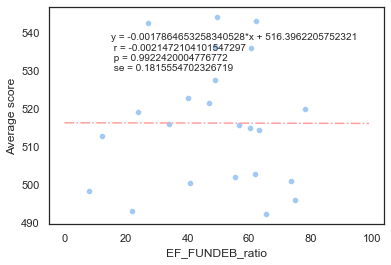

Graph considering SIOPE data from 2018 to 2022


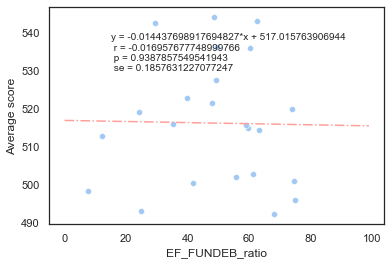

Graph considering SIOPE data from 2017 to 2022


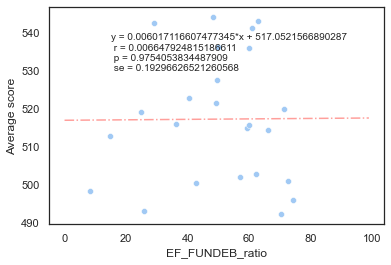

Graph considering SIOPE data from 2016 to 2022


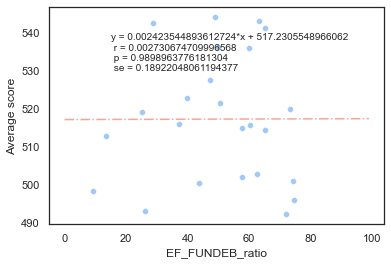

Graph considering SIOPE data from 2015 to 2022


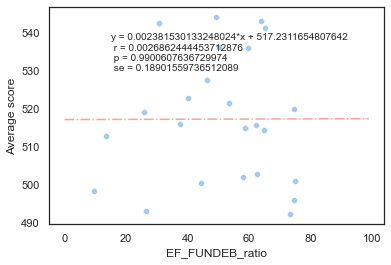

Graph considering SIOPE data from 2014 to 2022


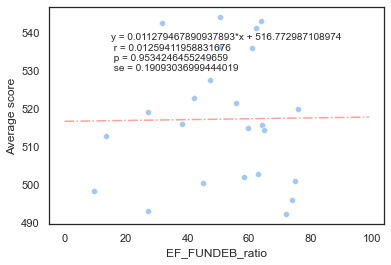

Graph considering SIOPE data from 2013 to 2022


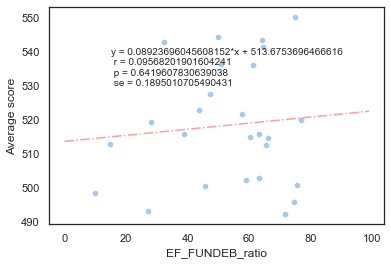

Graph considering SIOPE data from 2012 to 2022


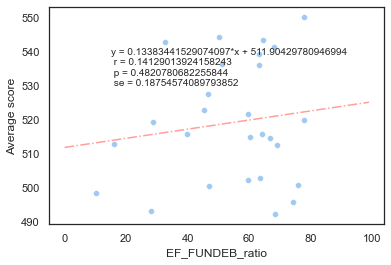

Graph considering SIOPE data from 2011 to 2022


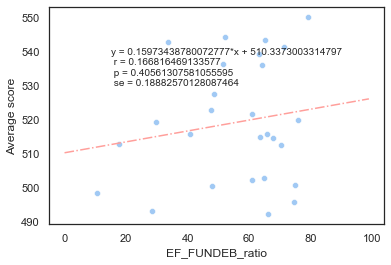

Graph considering SIOPE data from 2010 to 2022


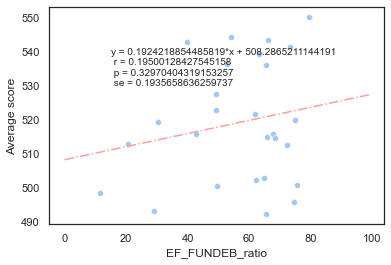

Graph considering SIOPE data from 2009 to 2022


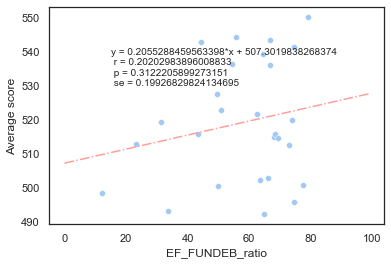

Graph considering SIOPE data from 2008 to 2022


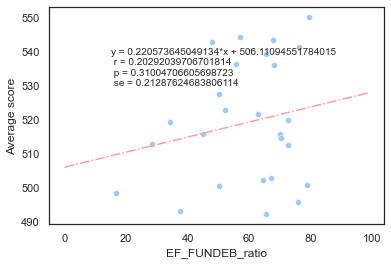

Graph considering SIOPE data from 2007 to 2022


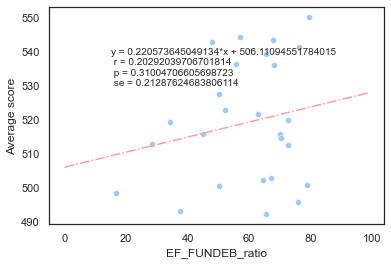

In [235]:
 n = np.arange(0,16)
# n = [0]
current_year = 2022

for window in n:
    # get metrics average values over last 'window' years
    grouped_siope_df = siope_df[(siope_df['year'] >= current_year - window)].groupby(["UF", "metric_description"])["metric_value"].mean().unstack()

    siope_data_with_scores_df = merge_siope_data_with_average_scores(SIOPE_METRICS_DICT, grouped_siope_df, enem_df, current_year)

    data = siope_data_with_scores_df.groupby(["UF"])[["Average score", "EF_FUNDEB_ratio"]].mean()
    print(f"Graph considering SIOPE data from {current_year - window} to {current_year}")
    sns.scatterplot(data = data,
    x = 'EF_FUNDEB_ratio',
    y = 'Average score'
    )

    data.dropna(inplace = True)
    slope, intercept, r, p, se = linregress(x = data["EF_FUNDEB_ratio"], y = data["Average score"])

    xx = np.arange(0,100)
    yy = slope*xx + intercept
    plt.plot(xx, yy, '-.r')

    plt.text(x = 15, y = 530, s = f"y = {slope}*x + {intercept}\n r = {r} \n p = {p} \n se = {se}")

    plt.show()

    del siope_data_with_scores_df


In [185]:
siope_data_with_scores_df

,UF,Average score,EI_FUNDEB_ratio,EF_FUNDEB_ratio,EM_FUNDEB_ratio,EF_to_total_education_expanses,EI_to_total_education_expanses,EM_to_total_education_expanses,education_to_overall_expanses,scholar_nutrition_to_total_education_expanses,...,EF_investment_per_student,EM_investment_per_student,EB_investment_per_student,investment_per_student,EB_expanses_teacher_per_student,EB_non_teaching_staff_per_student_expanses,investment_per_student_to_PIB_per_capita,superavit_or_deficit,FUNDEB_balance,FUNDEB_not_used
0,CE,449.925,0.0,15.96,87.89,2.97,0.26,60.33,20.56,1.24,...,11976.56,12248.57,15696.78,12971.03,6525.66,0.00,0.0,1.313628e+10,2.295158e+08,1.551525e+08
1,SP,766.925,0.0,59.06,41.00,26.70,0.02,29.61,15.46,0.00,...,7455.36,12117.59,15431.09,13663.72,5667.77,0.00,0.0,9.279689e+09,3.153663e+09,0.000000e+00
2,GO,539.050,0.0,84.74,14.01,59.19,0.27,18.62,15.84,0.00,...,15598.33,5291.85,12205.79,12074.60,4936.79,715.74,0.0,4.738318e+09,2.055113e+08,1.729171e+08
3,PA,457.450,0.0,40.71,61.33,29.74,0.01,56.44,15.75,0.00,...,11130.29,9800.40,10514.01,10374.46,6058.88,0.00,0.0,9.544098e+09,2.558299e+07,2.549017e+07
4,RJ,477.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659247,RS,409.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659248,RS,512.975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659249,RJ,503.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659250,MG,531.525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
siope_data_with_scores_df["EF_FUNDEB_RATIO"]

KeyError: 'EF_FUNDEB_RATIO'

In [205]:
siope_data_with_scores_df["UF"].unique()

array(['CE', 'SP', 'GO', 'PA', 'RJ', 'DF', 'MT', 'RN', 'RO', 'MA', 'BA',
       'AL', 'MG', 'SC', 'RS', 'AM', 'PI', 'PB', 'PR', 'PE', 'MS', 'ES',
       'AP', 'RR', 'SE', 'TO', 'AC'], dtype=object)

In [214]:
siope_data_with_scores_df[siope_data_with_scores_df["UF"].isin(["BH", "PI", "AP"])][["UF", "EF_FUNDEB_ratio"]][2000:3000]

,UF,EF_FUNDEB_ratio
71020,PI,12.48
71123,PI,12.48
71128,PI,12.48
71169,AP,71.63
71179,PI,12.48
...,...,...
115696,PI,12.48
115705,PI,12.48
115773,AP,71.63
115794,PI,12.48


<AxesSubplot: xlabel='Average score', ylabel='Count'>

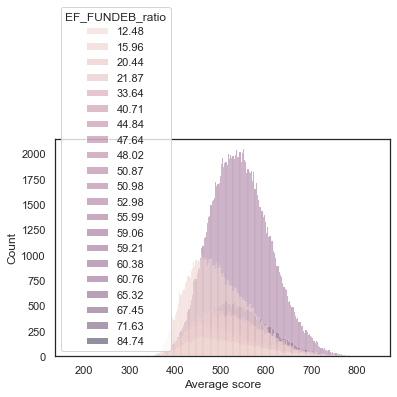

In [216]:
sns.histplot(data = siope_data_with_scores_df,
    x = 'Average score',
    hue = "EF_FUNDEB_ratio")

<ipython-input-220-bd7f086b3708>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sns.scatterplot(data = siope_data_with_scores_df.groupby(["UF"])["Average score", "EF_FUNDEB_ratio"].mean(),


<AxesSubplot: xlabel='EF_FUNDEB_ratio', ylabel='Average score'>

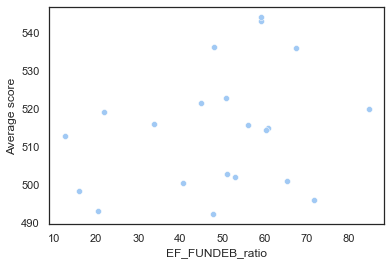

In [220]:
sns.scatterplot(data = siope_data_with_scores_df.groupby(["UF"])["Average score", "EF_FUNDEB_ratio"].mean(),
    x = 'EF_FUNDEB_ratio',
    y = 'Average score'
)

<AxesSubplot: xlabel='EF_FUNDEB_ratio', ylabel='Average score'>

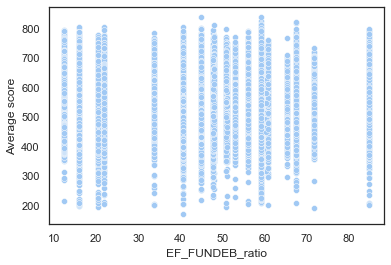

In [188]:
sns.scatterplot(data = siope_data_with_scores_df,
    x = 'EF_FUNDEB_ratio',
    y = 'Average score')